In [1]:
# importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y),1) #it is used for the reshaping the horizontal array into the vertical array
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
# we apply here feature scaling it is used for scaling the dataset of x and y on same scale for ploting the graph
from sklearn.preprocessing import StandardScaler
scx =  StandardScaler()
scy =  StandardScaler()
x = scx.fit_transform(X)
y = scy.fit_transform(y)

In [7]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [9]:
# training the dataset into the svm 
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # here the rbf is the radial basis function to measure how similar two data points are in a dataset
regressor.fit(X,y)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [10]:
# predicting the new results here we apply the inverse transform because we cannot pass the values of standard scalar to the predict method
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])).reshape(-1,1))

array([[90752.74868489]])

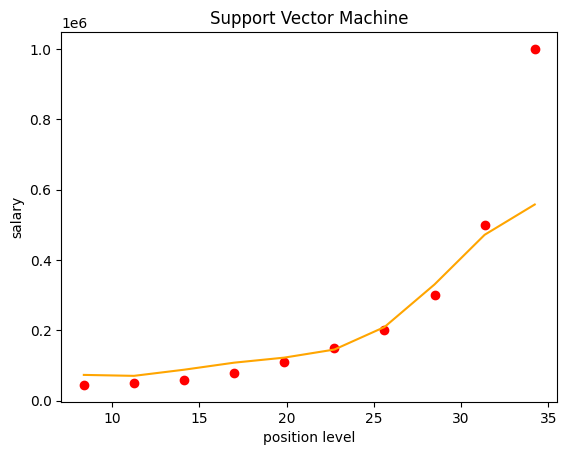

In [11]:
# visualizing the dataset using matplotlib librarie

plt.scatter(scx.inverse_transform(X),scy.inverse_transform(y),color='red')
plt.plot(scx.inverse_transform(X),scy.inverse_transform(regressor.predict(X).reshape(-1,1)),color='orange')
plt.title('Support Vector Machine')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()